# Tabular Training TPU Sample (Single Core)

<a href="https://colab.research.google.com/github/butchland/fastai_xla_extensions/blob/master/samples/TabularTrainingTPUdemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qqq --no-cache-dir torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchtext==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

     |████████████████████████████████| 735.4MB 1.2MB/s 
     |████████████████████████████████| 12.8MB 39.0MB/s 
     |████████████████████████████████| 7.0MB 6.4MB/s 


In [2]:
!pip install -Uqq fastcore --upgrade
!pip install -Uqq fastai --upgrade
# !pip install -Uqq fastai_xla_extensions
!pip install -Uqq git+https://github.com/butchland/fastai_xla_extensions.git

     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 194kB 5.1MB/s 


In [3]:
!curl -s https://course19.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [4]:
!pip install -Uqq cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.7-cp37-cp37m-linux_x86_64.whl
# VERSION = "20200325" #@param ["1.5" , "20200707", "20200325", "nightly"]
# !curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py > /dev/null
# !python pytorch-xla-env-setup.py --version $VERSION > /dev/null

     |████████████████████████████████| 133.6MB 104kB/s 
     |████████████████████████████████| 61kB 2.4MB/s 
ERROR: earthengine-api 0.1.254 has requirement google-api-python-client>=1.12.1, but you'll have google-api-python-client 1.8.0 which is incompatible.


In [5]:
!pip freeze | grep torch
!pip freeze | grep fast

torch==1.7.1+cu101
torch-xla==1.7
torchsummary==1.5.1
torchtext==0.8.0
torchvision==0.8.2+cu101
fastai==2.2.7
fastai-xla-extensions==0.0.8
fastcore==1.3.19
fastdtw==0.3.4
fastprogress==1.0.0
fastrlock==0.5


In [6]:
from fastai.tabular.all import *
from fastai_xla_extensions.all import *

In [7]:
path = untar_data(URLs.ADULT_SAMPLE)
Path.BASE_PATH = path
df = pd.read_csv(path/'adult.csv')

In [8]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])
dls.device

device(type='cpu')

In [9]:
learn = tabular_learner(dls, metrics=accuracy)

In [10]:
learn.to_xla() 

In [11]:

learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,time
0,0.372557,0.369504,0.820946,00:22
1,0.368491,0.363188,0.833077,00:20
2,0.355928,0.369257,0.825399,00:19
3,0.348726,0.359323,0.835995,00:20
4,0.345737,0.359949,0.834767,00:19
5,0.350663,0.358368,0.831081,00:19
6,0.351559,0.359353,0.834306,00:19
7,0.325950,0.364078,0.833231,00:19
8,0.345878,0.356251,0.837224,00:19
9,0.337517,0.357937,0.836456,00:20


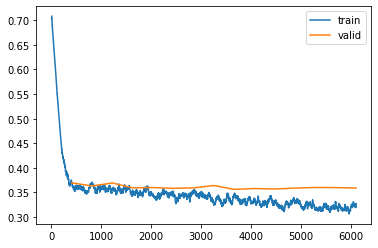

In [12]:
learn.recorder.plot_loss()

In [13]:
learn.predict(df.iloc[0])

(   workclass  education  marital-status  ...    fnlwgt  education-num  salary
 0        0.0        0.0             0.0  ... -0.833556        0.75899     0.0
 
 [1 rows x 11 columns], tensor(0), tensor([0.8668, 0.1332]))

In [14]:
test_df = df.copy()
test_df.drop(['salary'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)
learn.get_preds(dl=dl)

(tensor([[0.8667, 0.1333],
         [0.8113, 0.1887],
         [0.8590, 0.1410],
         ...,
         [0.9037, 0.0963],
         [0.9424, 0.0576],
         [0.9667, 0.0333]]), None)

In [15]:
learn.dls.device

device(type='xla', index=1)

In [16]:
one_param(learn.model).device

device(type='xla', index=1)

**End of Notebook**